In [1]:
import pandas as pd
import json
from pandas.io.json import json_normalize
import numpy as np
import seaborn as sns
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

# Stats
from scipy import stats
from scipy.stats import skew, norm
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

In [21]:
# load data using Python JSON module
with open('data/PostLeValoresSidly.json','r') as f:
    data = json.loads(f.read())

# Normalizing data
df = pd.json_normalize(data, record_path =['valures'], meta =['id'], meta_prefix='_', record_prefix='')

df = df.drop(columns=['_id'])

# Saving to CSV format
df.to_csv('data/PostLeValoresSidly.csv', index=False)

In [22]:
df.head()

,id,temp,saturacao,pulso,tipo
0,0,36.250000,95.0,63.0,TIMER
1,1,36.180000,96.0,70.0,TIMER
2,2,36.450001,96.0,72.0,TIMER
3,3,36.459999,98.0,57.0,TIMER
4,4,36.740002,95.0,74.0,TIMER


In [23]:
df.tail()

,id,temp,saturacao,pulso,tipo
7465,7465,0.0,0.0,0.0,ZONE
7466,7466,0.0,0.0,0.0,TIMER
7467,7467,0.0,0.0,0.0,ZONE
7468,7468,0.0,0.0,0.0,ZONE
7469,7469,0.0,0.0,0.0,TIMER


In [24]:
df.describe()

,id,temp,saturacao,pulso
count,7470.000000,7470.000000,7470.000000,7470.000000
mean,3734.500000,29.578050,77.960910,57.024230
std,2156.547588,14.340633,38.031839,29.696151
min,0.000000,0.000000,0.000000,0.000000
25%,1867.250000,36.150002,95.000000,52.000000
50%,3734.500000,36.430000,96.000000,66.000000
75%,5601.750000,36.709999,97.000000,78.000000
max,7469.000000,36.980000,99.000000,91.000000


In [6]:
df['tipo'].value_counts()

TIMER          6133
CHARGE         1094
ZONE            195
SOS              15
SOS_CPL          15
                 10
WORN              4
FULL_CHARGE       3
LOW_BATT          1
Name: tipo, dtype: int64

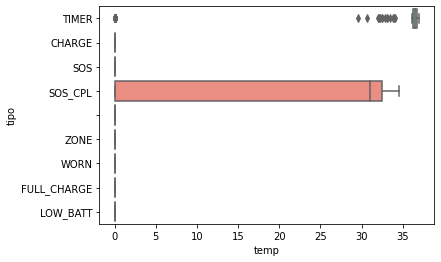

In [10]:
ax = sns.boxplot(x="temp", y="tipo", data=df, palette="Set3")

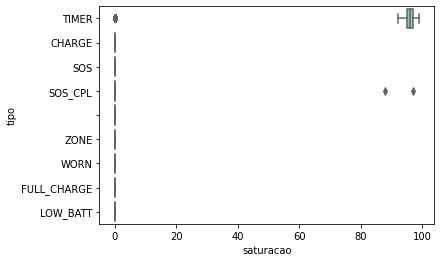

In [11]:
ax = sns.boxplot(x="saturacao", y="tipo", data=df, palette="Set3")

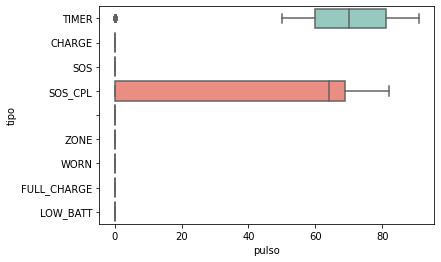

In [12]:
ax = sns.boxplot(x="pulso", y="tipo", data=df, palette="Set3")

In [28]:
df = df[df['id'] <= 6025]

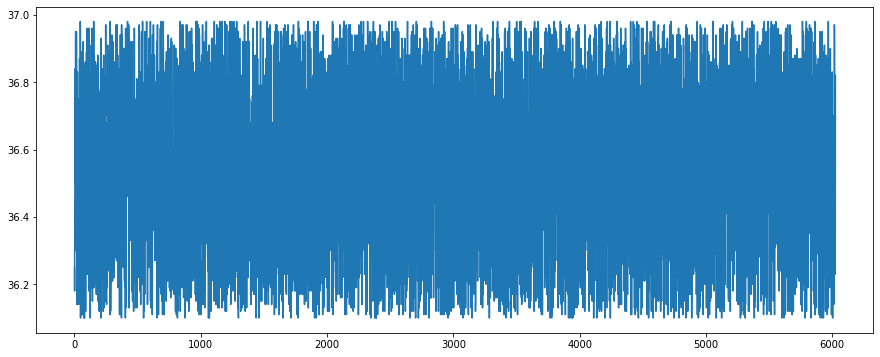

In [29]:
df.temp.plot(figsize = (15, 6))
plt.show()

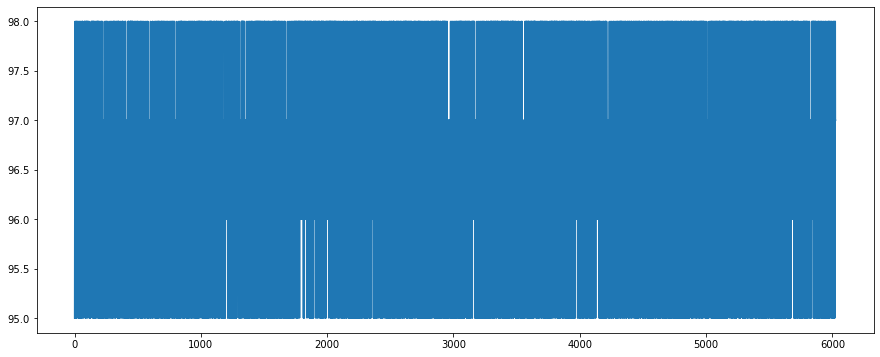

In [30]:
df.saturacao.plot(figsize = (15, 6))
plt.show()

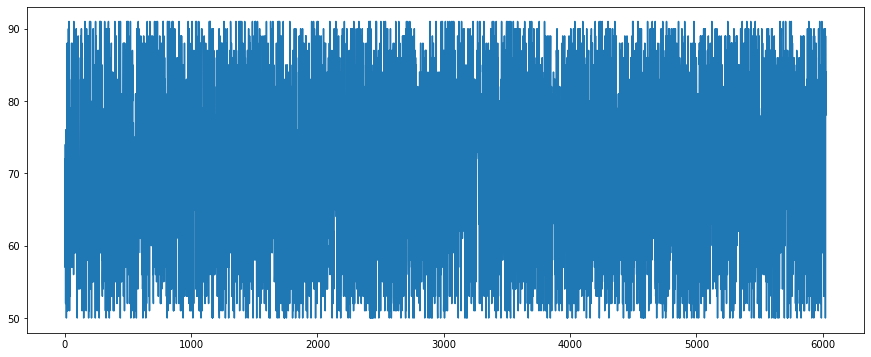

In [31]:
df.pulso.plot(figsize = (15, 6))
plt.show()

In [18]:
df = df.drop(columns=['tipo'])
df = df.set_index('id')

In [19]:
df.head()

,temp,saturacao,pulso
id,,,
0,36.250000,95.0,63.0
1,36.180000,96.0,70.0
2,36.450001,96.0,72.0
3,36.459999,98.0,57.0
4,36.740002,95.0,74.0


In [32]:
df.head(10)

,id,temp,saturacao,pulso,tipo
0,0,36.250000,95.0,63.0,TIMER
1,1,36.180000,96.0,70.0,TIMER
2,2,36.450001,96.0,72.0,TIMER
3,3,36.459999,98.0,57.0,TIMER
4,4,36.740002,95.0,74.0,TIMER
5,5,36.830002,97.0,67.0,TIMER
6,6,36.840000,95.0,52.0,TIMER
7,7,36.779999,95.0,76.0,TIMER
8,8,36.500000,97.0,74.0,TIMER
9,9,36.950001,98.0,60.0,TIMER
